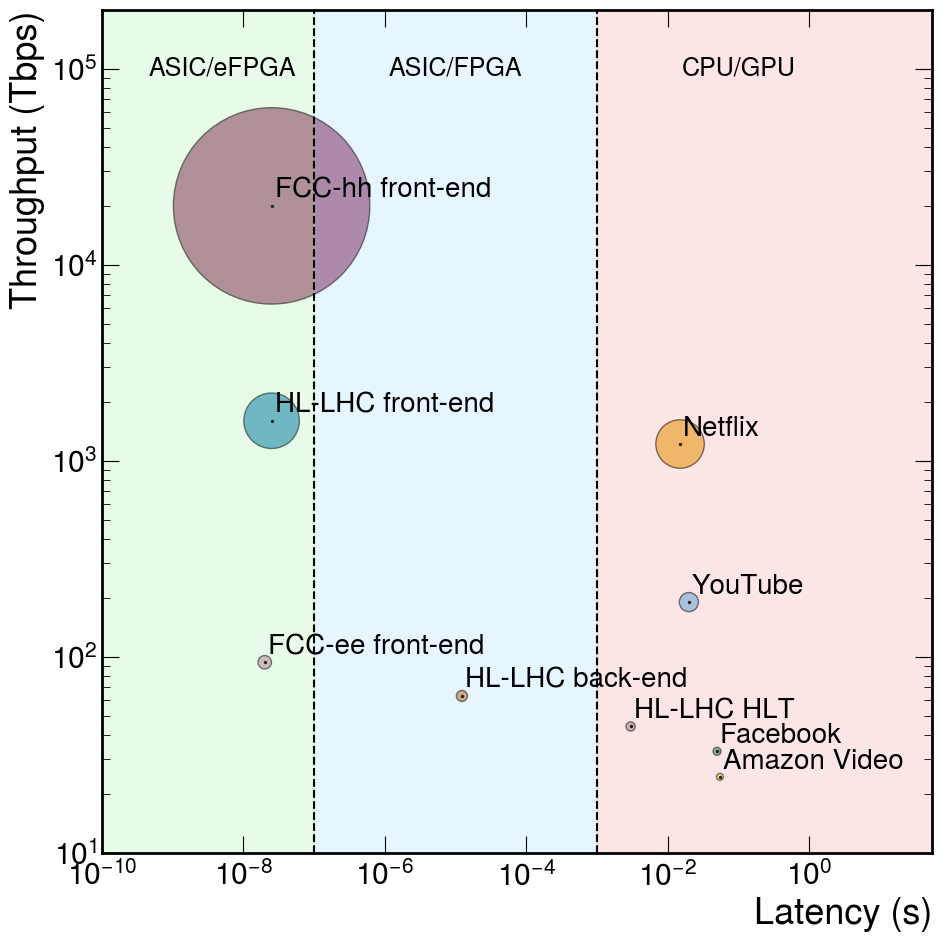

OSError: [Errno 30] Read-only file system: 'fastMLdomain.pdf'

<Figure size 1000x1000 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import mplhep

# Use CMS style
plt.style.use(mplhep.style.CMS)

# Data
services = ["Netflix", "YouTube", "Facebook", "Amazon Video", "HL-LHC front-end", "HL-LHC back-end", "HL-LHC HLT", "FCC-ee front-end", "FCC-hh front-end"]
latency = [0.015, 0.02, 0.05, 0.055, 2.5e-8, 1.23e-5, 3E-3, 2e-8, 2.5e-8]
throughput = [1217.37, 189.852, 32.859, 24.34, 1600, 63, 44, 93.6, 20000]

colors = [
    '#E69F00',  # orange
    '#56B4E9',  # sky blue
    '#009E73',  # green
    '#F0E442',  # yellow
    '#0072B2',  # blue
    '#D55E00',  # vermillion
    '#999999',  # grey
    '#CC79A7',  # pink
    '#882255'   # deep purple
]

# Plot
plt.figure()
plt.scatter(latency, throughput, s=throughput, alpha=0.6, c=colors, edgecolors='black')
plt.scatter(latency, throughput, s=2, c='black', alpha=1)  # black dot marker

# Add labels
for i, label in enumerate(services):
    plt.text(latency[i]*1.1, throughput[i]*1.1, label, fontsize=20)

plt.xlim(1e-10, np.max(latency) * 1000)
plt.ylim(10, np.max(throughput) * 10)


# Vertical lines
plt.axvline(1e-7, color='black', linestyle='--')
plt.axvline(1e-3, color='black', linestyle='--')

# Fill regions
plt.fill_betweenx([10, 1e6], 1e-10, 1e-7, color='lightgreen', alpha=0.2)
plt.fill_betweenx([10, 1e6], 1e-7, 1e-3, color='lightskyblue', alpha=0.2)
plt.fill_betweenx([10, 1e6], 1e-3, np.max(latency)*1000, color='lightcoral', alpha=0.2)

# Region labels
plt.text(5e-9, 1e5, 'ASIC/eFPGA', fontsize=18, rotation=0, verticalalignment='center',horizontalalignment='center')
plt.text(1e-5, 1e5, 'ASIC/FPGA', fontsize=18, rotation=0, verticalalignment='center',horizontalalignment='center')
plt.text(1e-1, 1e5, 'CPU/GPU', fontsize=18, rotation=0, verticalalignment='center',horizontalalignment='center')


plt.xscale('log')
plt.yscale('log')
plt.xlabel('Latency (s)')
plt.ylabel('Throughput (Tbps)')
plt.tight_layout()
plt.show()

plt.savefig("fastMLdomain.pdf", bbox_inches='tight')
plt.savefig("fastMLdomain.png", dpi=300, bbox_inches='tight')  # high-res PNG
